# Question

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
airlines=pd.read_excel(r"C:\Users\Madhu\Downloads\Airlines+Data.xlsx")

In [6]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [10]:
airlines.shape

(96, 2)

In [13]:

month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month=pd.DataFrame(month)
months=pd.DataFrame(np.tile(month,(8,1)))
Airlines=pd.concat([airlines,months],axis=1)
Airlines.columns=['Month','Passengers','months']

In [14]:
month_dummies=pd.get_dummies(Airlines['months'])
Airlines=pd.concat([Airlines,month_dummies],axis=1)
Airlines['t']=np.arange(1,97)
Airlines['t_sq']=Airlines['t']*Airlines['t']
Airlines['log_passengers']=np.log(Airlines['Passengers'])


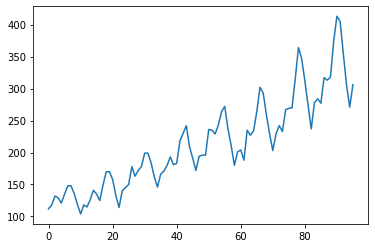

In [15]:
Train=Airlines[0:85]
Test=Airlines[85:]
plt.plot(Airlines.iloc[:,1])
Test.set_index(np.arange(1,12),inplace=True)

## Linear

In [19]:
import statsmodels.formula.api as smf
lin_model=smf.ols('Passengers~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Passengers']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin


55.674170015416216

## Exponential

In [20]:
exp_model=smf.ols('log_passengers~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Passengers']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

329.69175113922927

##  Quadratic

In [22]:
import statsmodels.formula.api as smf
quad_model=smf.ols('Passengers~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Passengers']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

50.65954577650039

## Additive Seasonality

In [24]:
import statsmodels.formula.api as smf
add_sea_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_add_sea=Test['Passengers']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

134.3447991043276

## Additive Seasonality Quadratic

In [25]:
add_sea_quad_model=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']])
error_add_sea_quad=Test['Passengers']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

27.41271496120818

## Mutiplicative Seasonality

In [26]:
import statsmodels.formula.api as smf
mul_sea_model=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_sea=Test['Passengers']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

330.1926780196679

## Multiplicative Additive Seasonality 

In [27]:
import statsmodels.formula.api as smf
mul_add_sea_model=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])
error_mul_add_sea=Test['Passengers']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

329.66032649959925

In [28]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table


,model,rmse_val
0,lin_model,55.674170
1,exp_model,329.691751
2,quad_model,50.659546
3,add_sea,134.344799
4,add_sea_quad,27.412715
5,mul_sea,330.192678
6,mul_add_sea,329.660326


# Additive Seasonality Quadratic is having least rmse
# So Additive Seasonality Quadratic model is the best model

## cocacola dataset

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
cocacola = pd.read_excel(r"C:\Users\Madhu\Downloads\CocaCola_Sales_Rawdata.xlsx")

In [32]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [33]:
cocacola.shape

(42, 2)

In [34]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [35]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [36]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [37]:
quarters=['Q1','Q2','Q3','Q4']
quarters=pd.DataFrame(quarters)
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))
Cocacola=pd.concat([cocacola,Quarters],axis=1)
Cocacola=Cocacola.dropna()
Cocacola.columns=['Quarter','Sales','quarters']

In [38]:
Quarter_dummies=pd.get_dummies(Cocacola['quarters'])
Cocacola=pd.concat([Cocacola,Quarter_dummies],axis=1)
Cocacola['t']=np.arange(1,43)
Cocacola['t_sq']=Cocacola['t']*Cocacola['t']
Cocacola['log_sales']=np.log(Cocacola['Sales'])

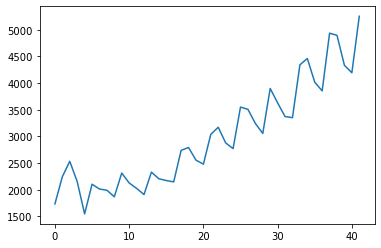

In [39]:
Train=Cocacola[0:30]
Test=Cocacola[30:]
plt.plot(Cocacola.iloc[:,1])
Test.set_index(np.arange(1,13),inplace=True)

# model

## Linear model

In [41]:
import statsmodels.formula.api as smf
lin_model=smf.ols('Sales~t',data=Train).fit()
predict_lin=lin_model.predict(Test['t'])
error_lin=Test['Sales']-predict_lin
rmse_lin=np.sqrt(np.mean(error_lin**2))
rmse_lin

714.0144483281297

## Exponential model

In [42]:
import statsmodels.formula.api as smf
exp_model=smf.ols('log_sales~t',data=Train).fit()
predict_exp=exp_model.predict(Test['t'])
error_exp=Test['Sales']-predict_exp
rmse_exp=np.sqrt(np.mean(error_exp**2))
rmse_exp

4252.188990972336

## Quadratic model

In [43]:
quad_model=smf.ols('Sales~t+t_sq',data=Train).fit()
predict_quad=quad_model.predict(Test[['t','t_sq']])
error_quad=Test['Sales']-predict_quad
rmse_quad=np.sqrt(np.mean(error_quad**2))
rmse_quad

646.2715428311323

## Additive Seasonality

In [44]:
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_add_sea=add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_add_sea=Test['Sales']-predict_add_sea
rmse_add_sea=np.sqrt(np.mean(error_add_sea**2))
rmse_add_sea

1778.0065467941363

## Additive Seasonality Quadratic 

In [45]:
add_sea_quad_model=smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
predict_add_sea_quad=add_sea_quad_model.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']])
error_add_sea_quad=Test['Sales']-predict_add_sea_quad
rmse_add_sea_quad=np.sqrt(np.mean(error_add_sea_quad**2))
rmse_add_sea_quad

586.0533067870459

## Multiplicative Seasonality

In [46]:
mul_sea_model=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_sea=mul_sea_model.predict(Test[['Q1','Q2','Q3','Q4']])
error_mul_sea=Test['Sales']-predict_mul_sea
rmse_mul_sea=np.sqrt(np.mean(error_mul_sea**2))
rmse_mul_sea

4252.638677789394

## Multiplicative Additive Seasonality

In [47]:
mul_add_sea_model=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=Train).fit()
predict_mul_add_sea=mul_add_sea_model.predict(Test[['t','Q1','Q2','Q3','Q4']])
error_mul_add_sea=Test['Sales']-predict_mul_add_sea
rmse_mul_add_sea=np.sqrt(np.mean(error_mul_add_sea**2))
rmse_mul_add_sea

4252.185655793222

In [48]:
data={'model':['lin_model','exp_model','quad_model','add_sea','add_sea_quad','mul_sea','mul_add_sea'],'rmse_val':[rmse_lin,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea]}
rmse_table=pd.DataFrame(data)
rmse_table

,model,rmse_val
0,lin_model,714.014448
1,exp_model,4252.188991
2,quad_model,646.271543
3,add_sea,1778.006547
4,add_sea_quad,586.053307
5,mul_sea,4252.638678
6,mul_add_sea,4252.185656


# Additive Seasonality Quadratic is having least rmse
# So Additive Seasonality Quadratic model is the best model